<a href="https://colab.research.google.com/github/PhoenixChakraborty/IITK-Python-for-AI-ML-DL/blob/main/Proj_15_DeepLearning_CIFAR_10_Epoch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


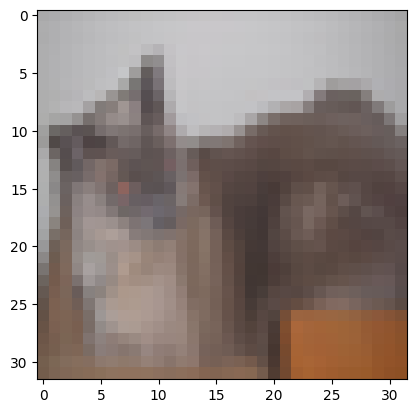

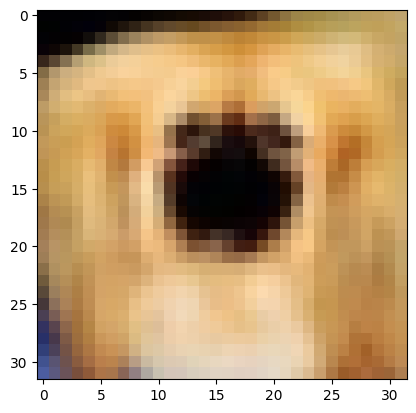

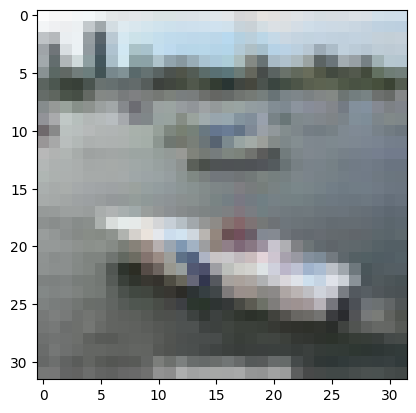

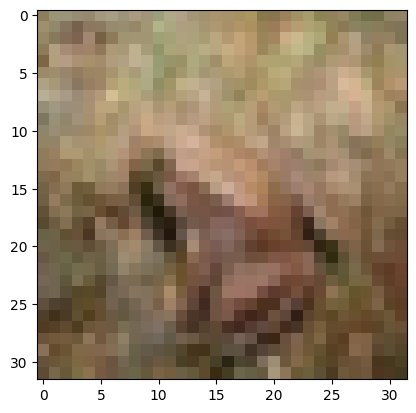

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.3460 - loss: 1.9975 - val_accuracy: 0.5308 - val_loss: 1.2944
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5692 - loss: 1.2146 - val_accuracy: 0.6223 - val_loss: 1.0850
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6521 - loss: 0.9963 - val_accuracy: 0.7057 - val_loss: 0.8394
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Accuracy score is 70.57 %
Confusion matrix of Neural Network is 
 [[754  11  53  10  42   1   1   8  78  42]
 [ 34 860   0   2   1   3   5   3  41  51]
 [102   7 500  51 163  72  32  36  19  18]
 [ 50  18  61 489  98 129  51  31  30  43]
 [ 38   8  50  45 721  12  44  58  13  11]
 [ 23   3  44 161  64 588  17  64  15  21]
 [ 15  11  52  72  68  18 733   4  24   3]
 [ 34   4  32  23  76  55   6 728   3  39]
 [ 70  20   3   4   9   3   2   2 873  14]
 [ 40 104   2   3   3   0   1   3  33 811]] 



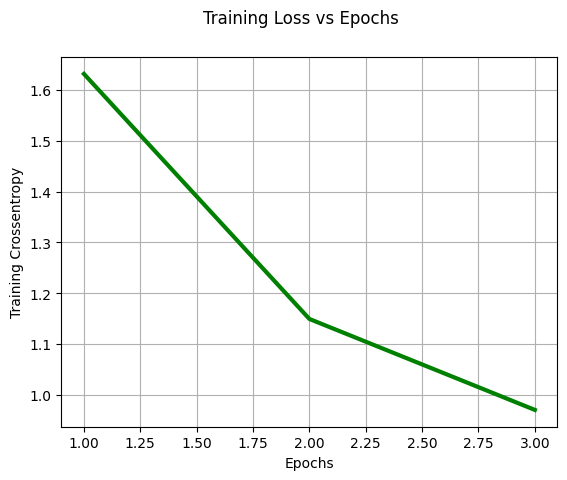

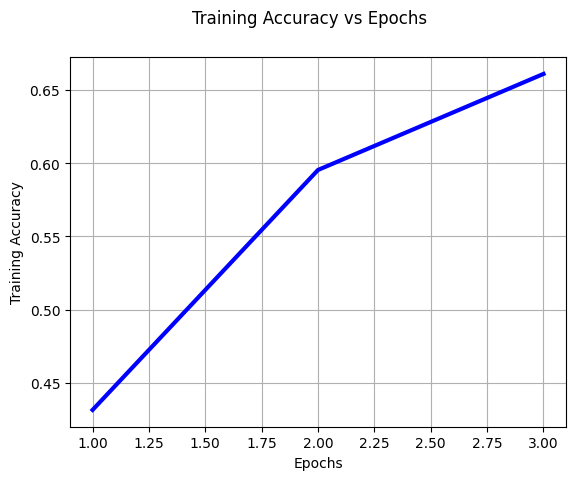

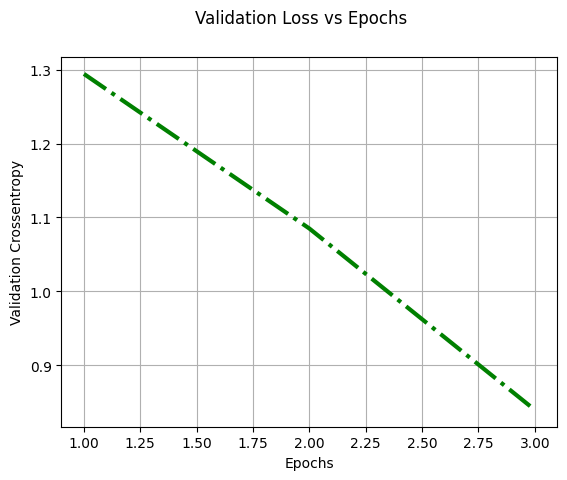

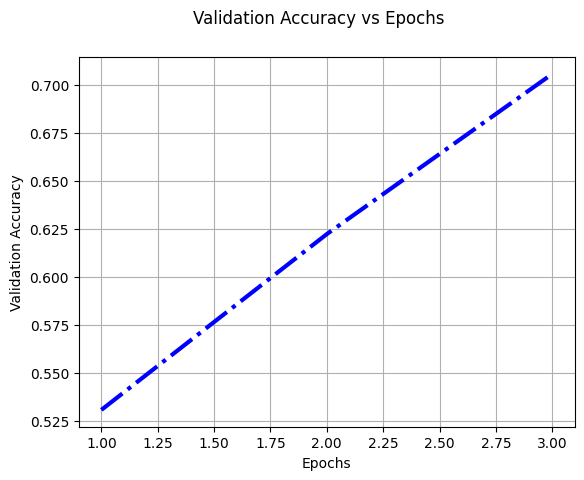

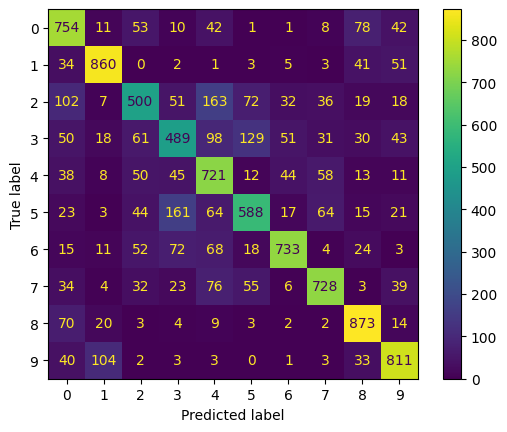

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

nc = 10 # Number of classes

#CIFAR is an acronym that stands for the Canadian
#Institute For Advanced Research and the CIFAR-10
#dataset was developed along with the CIFAR-100
#dataset by researchers at the CIFAR institute.

#The dataset is comprised of 60,000 32×32
#pixel color photographs of objects from 10 classes,
#such as frogs, birds, cats, ships, etc.
#The class labels and their standard associated
#integer values are listed below.

#0: airplane
#1: automobile
#2: bird
#3: cat
#4: deer
#5: dog
#6: frog
#7: horse
#8: ship
#9: truck

(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(3)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(4)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/ 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0

ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth=nc)

model = Sequential ()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout (0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout (0.5))

model.add(Conv2D(128, (3, 3), activation='relu', padding= 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout (0.5))

model.add (Flatten())
model.add (Dense(128, activation='relu'))
model.add (BatchNormalization())
model.add (Dropout (0.5))
model.add (Dense(10, activation= 'softmax'))

# model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(Xtrain, ytrainEnc, epochs=100, validation_data=(Xtest, ytestEnc))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=3, validation_data=(Xtest, ytest))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()